# (Dataset Exploration Title)
## by (Hassan Khaled Rady)

## Preliminary Wrangling

> baywheels-data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# %matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


In [4]:
# removing nulls and duplicates
print("nulls:\n", df.isnull().sum())
df.dropna(inplace=True)
print("duplicates: ", df.duplicated().sum())

nulls:
 duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64
duplicates:  0


In [5]:
# converting date columns from object to datetime
df_copy = df.copy()
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

# droping unwanted columns
df_copy.drop(columns=['start_station_name', 'end_station_name'], inplace=True)
# adding a duration in minites column
df_copy['duration_min'] = df_copy['duration_sec'] / 60
# removing records with not accurate birth year
df_copy = df_copy.query('member_birth_year > 1935')
# 
df_copy['age'] = (2020 - df_copy['member_birth_year'])
df_copy.nunique()

duration_sec                 4429
start_time                 174752
end_time                   174750
start_station_id              329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              63
member_gender                   3
bike_share_for_all_trip         2
duration_min                 4429
age                            63
dtype: int64

In [6]:
df_copy.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,age
count,174763.000000,174763.000000,174763.000000,174763.000000,174763.000000,174763.000000,174763.000000,174763.000000,174763.000000,174763.000000,174763.000000
mean,704.306569,139.020782,37.771202,-122.351720,136.641000,37.771397,-122.351296,4482.321618,1984.873972,11.738443,35.126028
std,1643.018071,111.648250,0.100441,0.117774,111.349641,0.100345,0.117337,1659.221305,9.879564,27.383635,9.879564
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1938.000000,1.016667,19.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,5.383333,28.000000
50%,511.000000,104.000000,37.780787,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,8.516667,33.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.285633,5505.000000,1992.000000,13.150000,40.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,1409.133333,82.000000


### What is the structure of your dataset?

> There are 519700 trips in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip). Most variables are numeric and there are two date variables.

### What is/are the main feature(s) of interest in your dataset?

> duration_sec, member_gender and user_type are the main important features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> member_birth_year.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

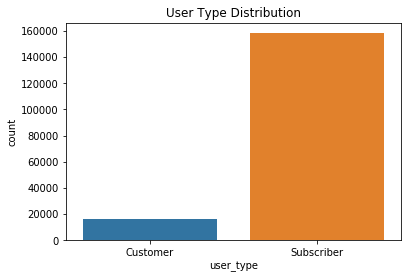

In [7]:
sb.countplot(data=df_copy, x='user_type');
plt.title('User Type Distribution');

it seems subscriber users are having much more trips than customer users.

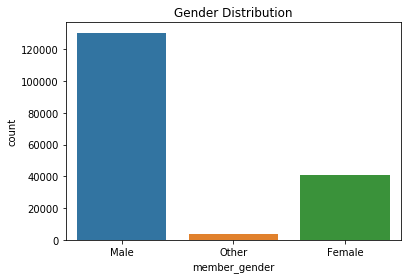

In [8]:
sb.countplot(data=df_copy, x='member_gender');
plt.title('Gender Distribution');

males are much more than females in bike riding.

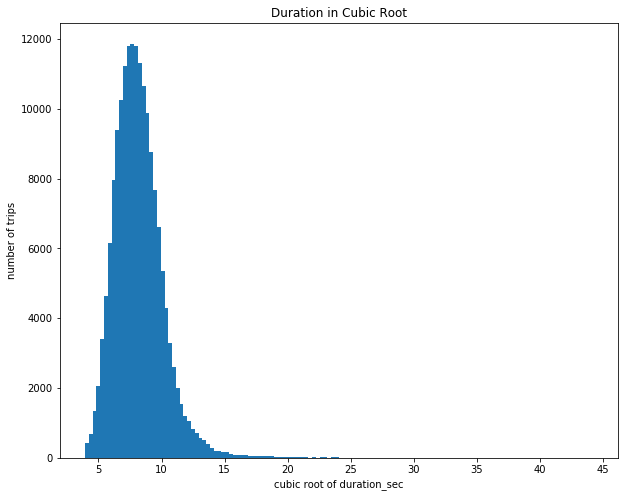

In [9]:
df_copy['duration_sec_cubicroot'] = df_copy['duration_sec'] ** (1/3)
plt.figure(figsize=(10,8))
bins = np.arange(df_copy['duration_sec_cubicroot'].min(), df_copy['duration_sec_cubicroot'].max()+0.3, 0.3)
plt.hist(data=df_copy, x='duration_sec_cubicroot', bins=bins)
plt.xlabel('cubic root of duration_sec');
plt.ylabel('number of trips');
plt.title('Duration in Cubic Root');

I used cubic root to scale the duration to be more clearer to interpreted and the plot shows its right skewed and that is only natural because not many people have long period trips. 

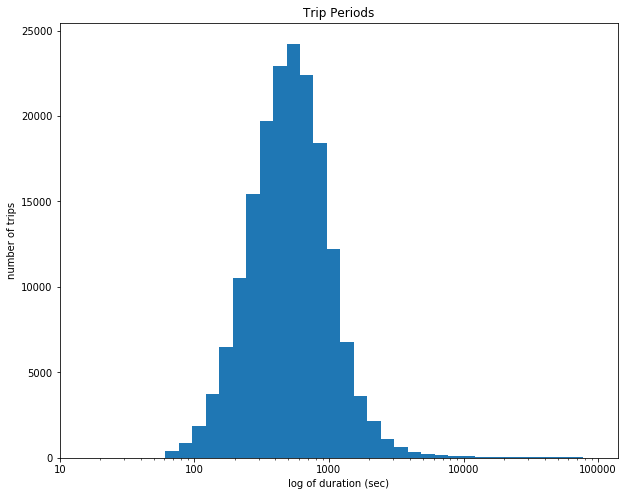

In [10]:
plt.figure(figsize=(10,8))
xticks = [10 , 100 , 1000, 10000, 100000]
xlabels = [f"{x}" for x in  xticks]
bins = 10 ** np.arange(np.log10(df_copy['duration_sec'].min()), np.log10(df_copy['duration_sec'].max())+0.1, 0.1)
plt.hist(data=df_copy, x='duration_sec', bins=bins);
plt.xscale('log')
plt.xticks(xticks, xlabels)
plt.ylabel('number of trips');
plt.xlabel('log of duration (sec)')
plt.title('Trip Periods');

here i used log in scaling.

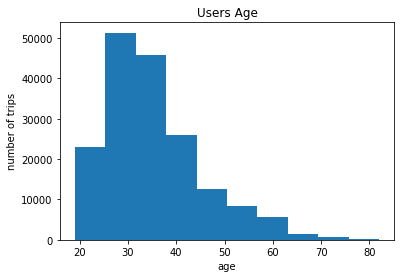

In [11]:
plt.hist(data=df_copy, x='age');
plt.xlabel('age')
plt.ylabel('number of trips')
plt.title('Users Age');

most of the users are young and this is natural.

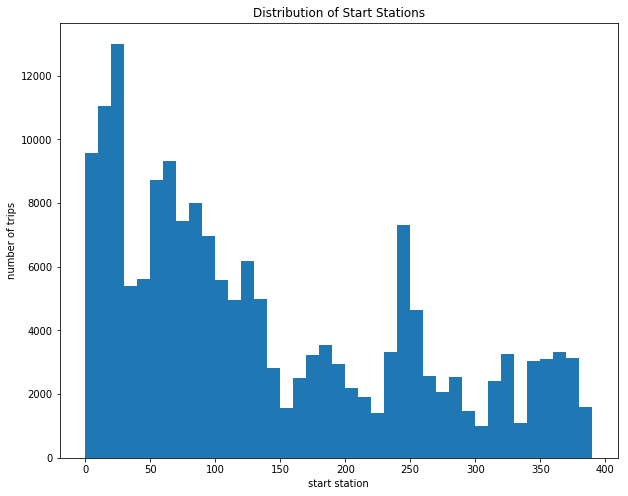

In [12]:
plt.figure(figsize=(10,8))
bins = np.arange(0, df_copy.start_station_id.astype(float).max(), 10)
plt.hist(data=df_copy, x='start_station_id', bins=bins)
plt.xlabel('start station')
plt.title('Distribution of Start Stations')
plt.ylabel('number of trips');

it looks like the stations from 0 to 25 are much busier.

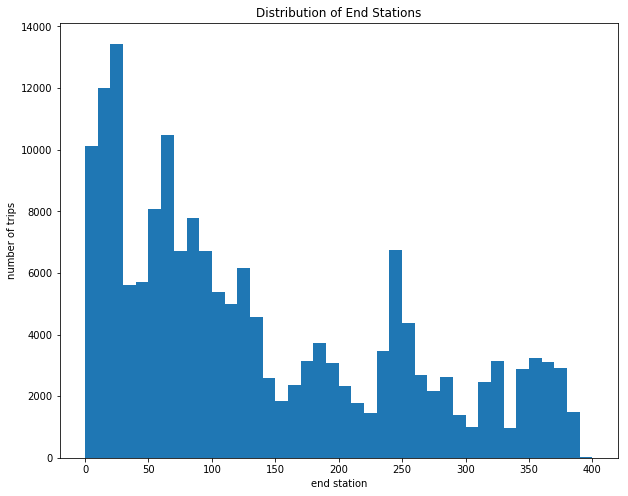

In [13]:
plt.figure(figsize=(10,8))
bins = np.arange(0, df_copy.end_station_id.astype(float).max()+10, 10)
plt.hist(data=df_copy, x='end_station_id', bins=bins)
plt.xlabel('end station')
plt.title('Distribution of End Stations')
plt.ylabel('number of trips');

it looks like the stations from 0 to 25 are much busier.

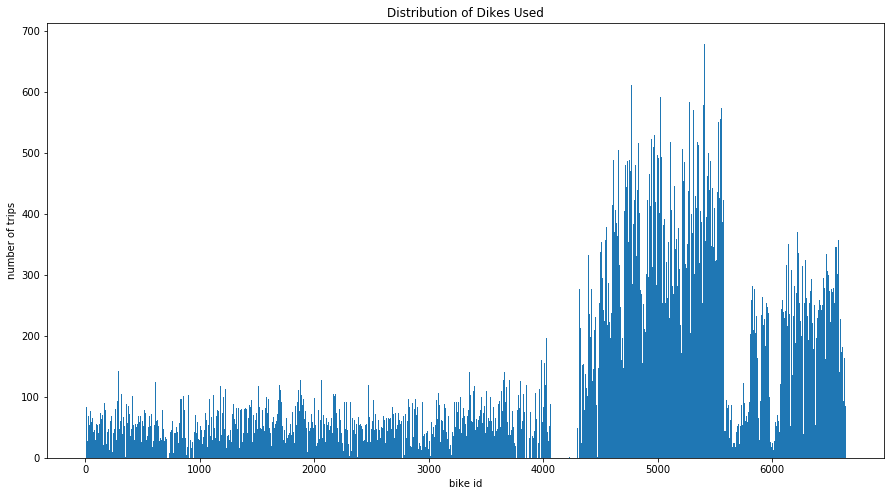

In [14]:
plt.figure(figsize=(15,8))
bins = np.arange(0, df_copy.bike_id.max()+5, 5)
plt.hist(data=df_copy, x='bike_id', bins=bins);
plt.title('Distribution of Dikes Used')
plt.xlabel('bike id')
plt.ylabel('number of trips');

it looks like bikes from 4400 5500 is being used than more.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> there was no any unusual points so far and i had to scale the duration to be easier to interpret.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the data was pretty much clean i only had to convert the 2 date variables from object to datetime.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

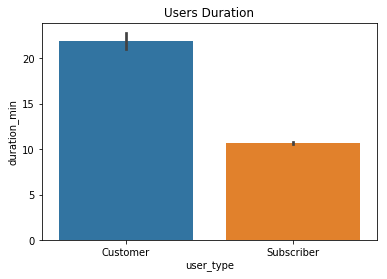

In [15]:
sb.barplot(data=df_copy, x='user_type', y='duration_min');
plt.title('Users Duration');

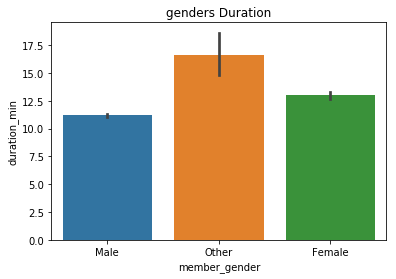

In [16]:
sb.barplot(data=df_copy, x='member_gender', y='duration_min');
plt.title('genders Duration');

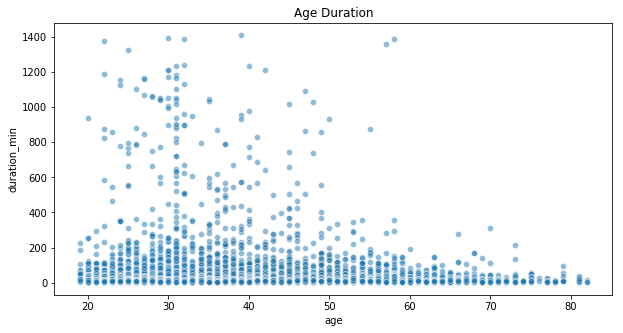

In [17]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=df_copy, x='age', y='duration_min', alpha=0.5);
plt.title('Age Duration');

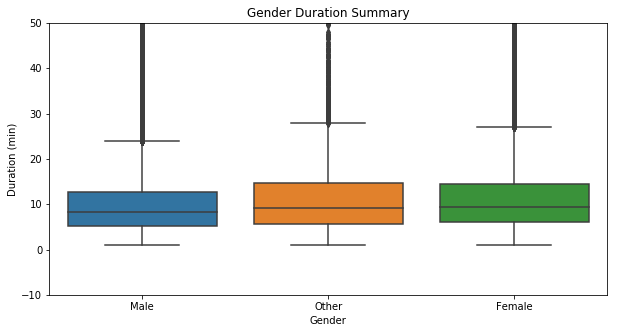

In [18]:
plt.figure(figsize=(10,5))
sb.boxplot(data = df_copy, x = 'member_gender', y = 'duration_min')
plt.ylim([-10, 50])
plt.xlabel('Gender')
plt.ylabel('Duration (min)');
plt.title('Gender Duration Summary');

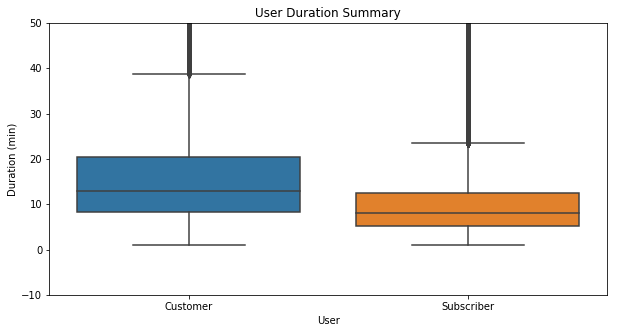

In [19]:
plt.figure(figsize=(10,5))
sb.boxplot(data = df_copy, x = 'user_type', y = 'duration_min')
plt.ylim([-10, 50])
plt.xlabel('User')
plt.ylabel('Duration (min)');
plt.title('User Duration Summary');

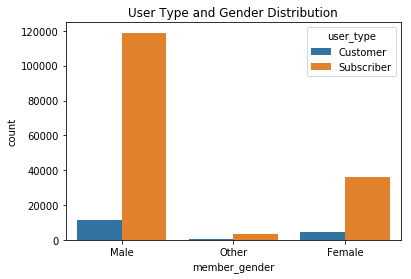

In [20]:
sb.countplot(data=df_copy, x='member_gender', hue='user_type')
plt.title('User Type and Gender Distribution');

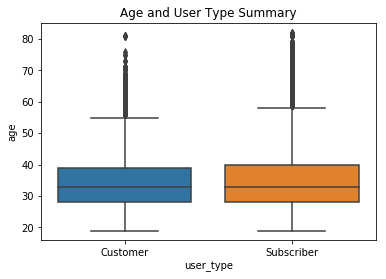

In [21]:
sb.boxplot(data=df_copy, x='user_type', y='age');
plt.title('Age and User Type Summary');

In [22]:
print('Customer mean age: {:.3f} '.format( df_copy.query('user_type == "Customer"').age.mean()))
print('Subscriber mean age: {:.3f} '.format( df_copy.query('user_type == "Subscriber"').age.mean()))

Customer mean age: 34.609 
Subscriber mean age: 35.180 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> the customer users spent much more time on trips than subscriber users

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the male users are much more than female users but female users are having longer trips than male users have also customer users having longer trips than subscriber users even though customer users are much less than subscriber users.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

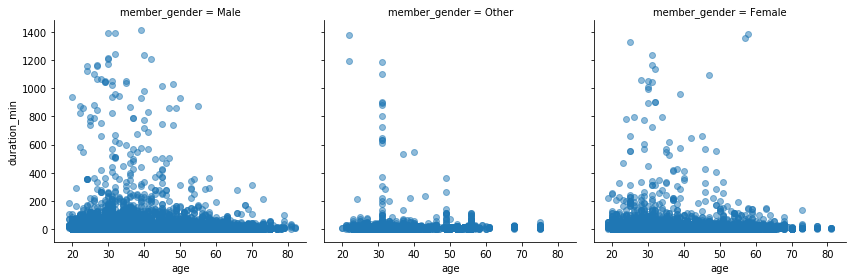

In [23]:
g = sb.FacetGrid(data=df_copy, col='member_gender', height=4)
g.map(plt.scatter, 'age', 'duration_min', alpha=0.5);

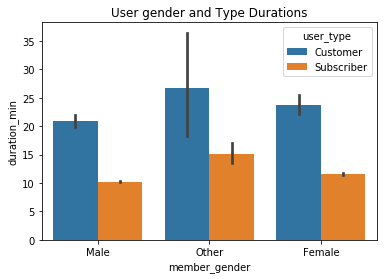

In [24]:
sb.barplot(data=df_copy, x='member_gender', y='duration_min', hue='user_type');
plt.title('User gender and Type Durations');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Customers that have long trips their gender is not recorded, younger people are having longer and more trips than older people

### Were there any interesting or surprising interactions between features?

> I thought that subscribers are having a longer trips since they are subscriber but it turned out customers are the ones with the longer trips.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!